In [29]:
import time
import pickle
from qiskit import QuantumCircuit
from qiskit_braket_provider import BraketProvider

In [5]:
with open('./501_GQCOCircuit.pkl', 'rb') as f:
    qc_gqco = pickle.load(f)

with open('./502_QAOACircuit.pkl', 'rb') as f:
    qc_qaoa = pickle.load(f)

## Setups

In [84]:
nshots = 3200

In [89]:
def myrun(qc, device, nshots=10):
    mytask = device.run(qc, shots=nshots)
    task_id = mytask.task_id()
    print(task_id)
    retrieved_task = device.retrieve_job(task_id=task_id)
    
    status = retrieved_task.status().name
    print('Status of quantum task:', status)
    
    # wait for job to complete
    while status != 'DONE':
        time.sleep(10)
        status = retrieved_task.status().name
        print('Status:', status)
        
    data = retrieved_task.result()
    display(plot_histogram(data.get_counts()))

## Run

In [85]:
provider = BraketProvider()
provider.backends(statuses=["ONLINE"], types=["SIMULATOR"])

[BraketBackend[SV1], BraketBackend[TN1], BraketBackend[dm1]]

In [86]:
device = provider.get_backend("SV1")

In [87]:
qc_gqco.draw()

»
q_0: ──■───────────────────────────────────────────────────────────────»
       │ZZ(π/3)                                       ┌───┐┌──────────┐»
q_1: ──■──────────────────────────────────────────────┤ X ├┤ Rz(-π/3) ├»
     ┌─────────┐┌─────────┐┌─────────┐┌─────────┐     └─┬─┘└──────────┘»
q_2: ┤ Rz(π/5) ├┤ Ry(π/3) ├┤ Ry(π/3) ├┤ Ry(π/3) ├──■────■──────────────»
     └──┬───┬──┘└─────────┘└─────────┘└─────────┘  │                   »
q_3: ───┤ X ├──────────────────────────────────────┼───────────────────»
        └───┘                                    ┌─┴─┐┌───┐            »
q_4: ────────────────────────────────────────────┤ X ├┤ X ├────────────»
                                                 └───┘└───┘            »
«                         ┌───┐
«q_0: ─■─────────■────────┤ X ├
«      │         │ZZ(π/4) ├───┤
«q_1: ─┼─────────■────────┤ X ├
«      │ZZ(π/3)   ┌───┐   └───┘
«q_2: ─■──────────┤ X ├────────
«                 └───┘        
«q_3: ─────────────────────────
«                              
«q_4: ─────────────────────────
«

In [88]:
## We need to add x gate for each qubit because of error: ValidationException: An error occurred (ValidationException) when calling the CreateQuantumTask operation: Please make sure all qubits in the qubit register are used for tasks submitted to simulators
qc_gqco.x(0)
qc_gqco.x(1)
qc_gqco.x(2)
qc_gqco.x(3)
qc_gqco.x(4)

In [ ]:
myrun(qc_gqco, device, nshots)

arn:aws:braket:us-east-1:025066270948:quantum-task/44f1d230-7429-4410-8436-048eec4e2891
Status of quantum task: QUEUED


arn:aws:braket:us-east-1:025066270948:quantum-task/2bbf17ee-3a70-4d1a-954f-5f2e0ab84a19
Status of quantum task: QUEUED
Status: DONE


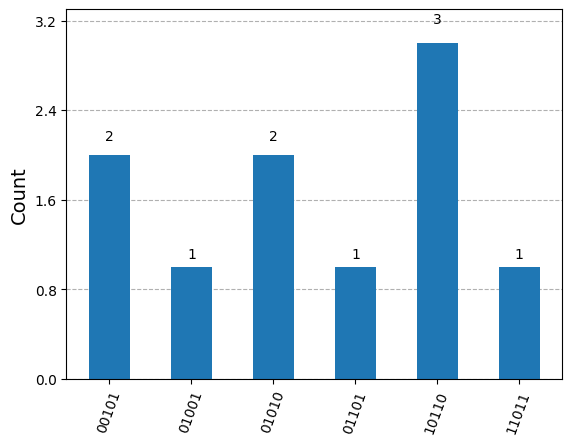

In [64]:
myrun(qc_qaoa, device, nshots)